# Getting used to the jupyter notebook

In [1]:
print(1)

1


In [2]:
a = [1, 2]
len(a)

2

In [3]:
sum(a)

3

Get help by adding a question-mark next to the function name:

In [4]:
sum?

Signature: sum(iterable, start=0, /)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method


You can also press ``<shift> + <tab>`` after the opening parenthesis of a function:

In [5]:
sum(a)

3

# Data loading with Pandas

In [2]:
import pandas as pd

In [3]:
# subset of the 1993 US census
data = pd.read_csv("adult.csv", index_col=0)

In [4]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Simple analysis

In [5]:
data.shape

(32561, 14)

In [27]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [25]:
#counting number of unique values in income column
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

income
 <=50K    AxesSubplot(0.125,0.125;0.775x0.755)
 >50K     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

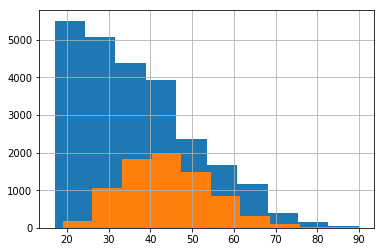

In [28]:
%matplotlib inline
data.groupby("income").age.hist()

# Splitting into training and test data

In [29]:
X = data.drop("income", axis=1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = data.income

In [31]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [32]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) #default is 25-75 split

In [ ]:
X_train.head()

In [ ]:
X_train.shape

# Exercises

Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("boston_house_prices.csv")

In [9]:
print("Number of samples: {} number of features: {}".format(data.shape[0],data.shape[1]))

Number of samples: 506 number of features: 14


In [10]:
data.shape[1]

14

In [16]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
print("Columns")
print(data.columns)

Columns
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [12]:
x = data.drop("MEDV", axis = 1)
y = data.MEDV

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape)

(379, 13)


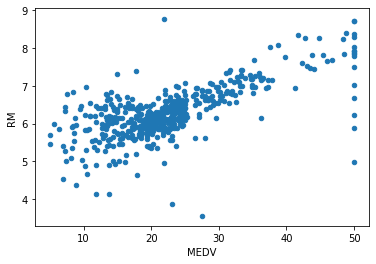

In [15]:
# Plot average room number RM vs MEDV
data.plot("MEDV","RM",kind="scatter")

# Data Loading from Scikit-learn

In [18]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()

In [24]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [26]:
digits.target.shape

(1797,)